# Breast Cancer Prediction

## Import all python libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Load Dataset from specified csv file

In [2]:
breast_cancer=pd.read_csv(r"breastcancer_raw.csv")

## Print first few rows of the dataset

In [3]:
breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Drop na values

In [4]:
breast_cancer.dropna(inplace=True)

## Create pairplots for the first few features against the diagnosis to visualize the distribution and relationships between features.

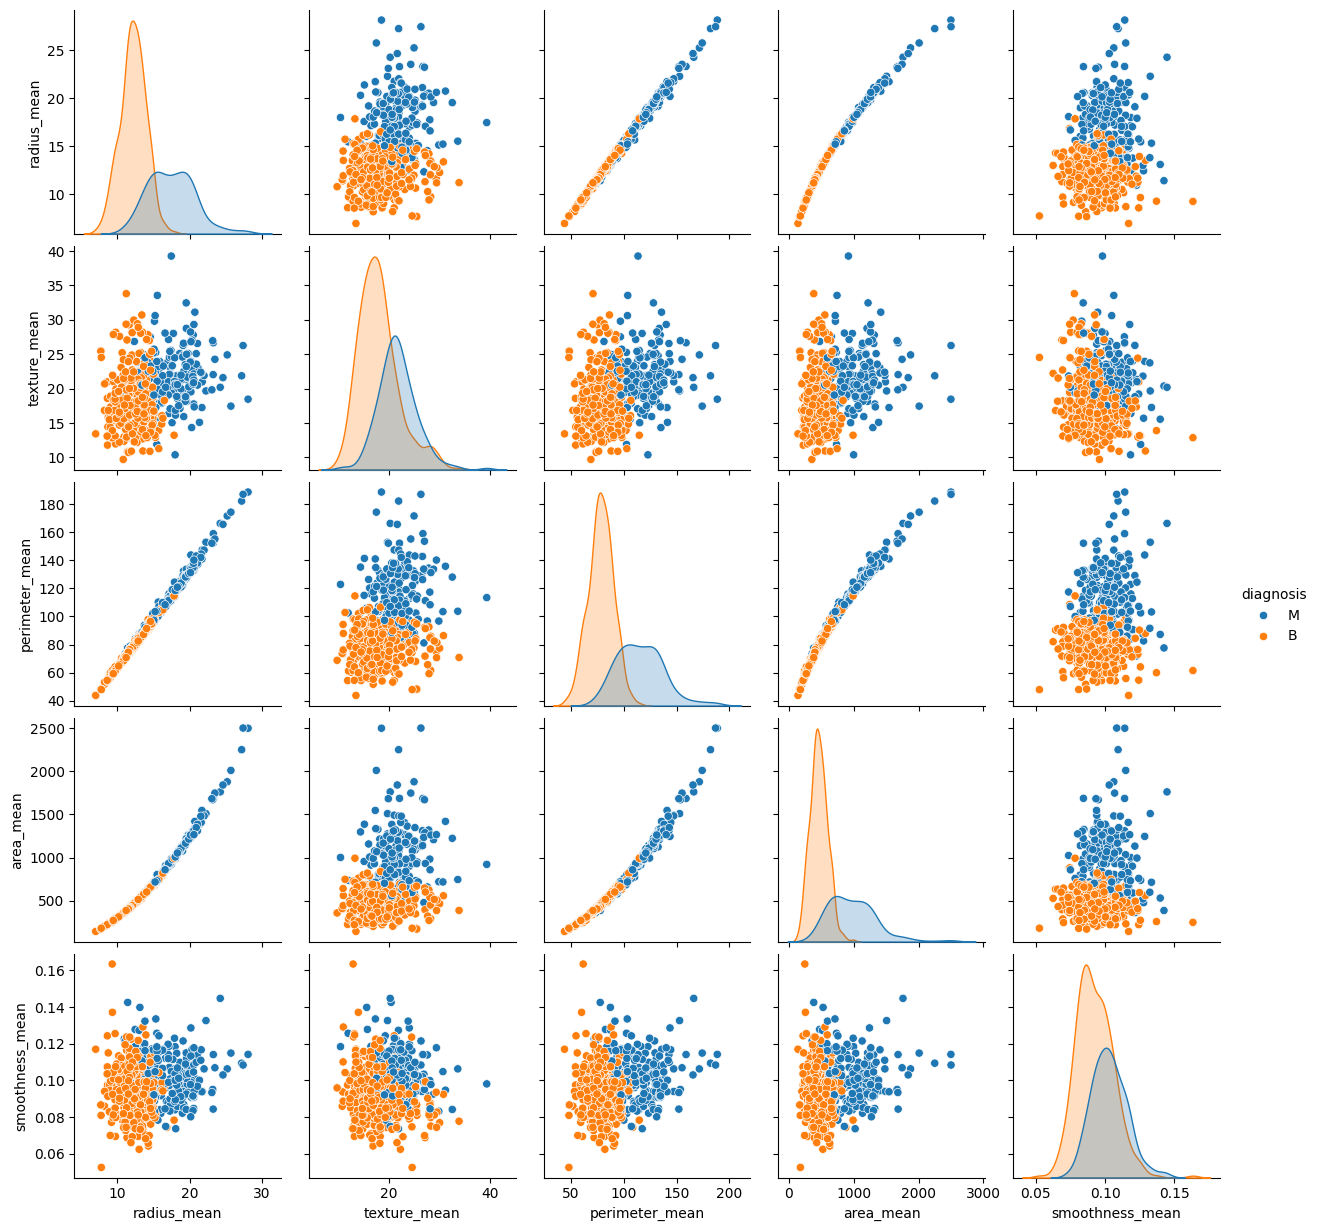

In [5]:
sns.pairplot(breast_cancer, vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean'], hue='diagnosis')
plt.show()


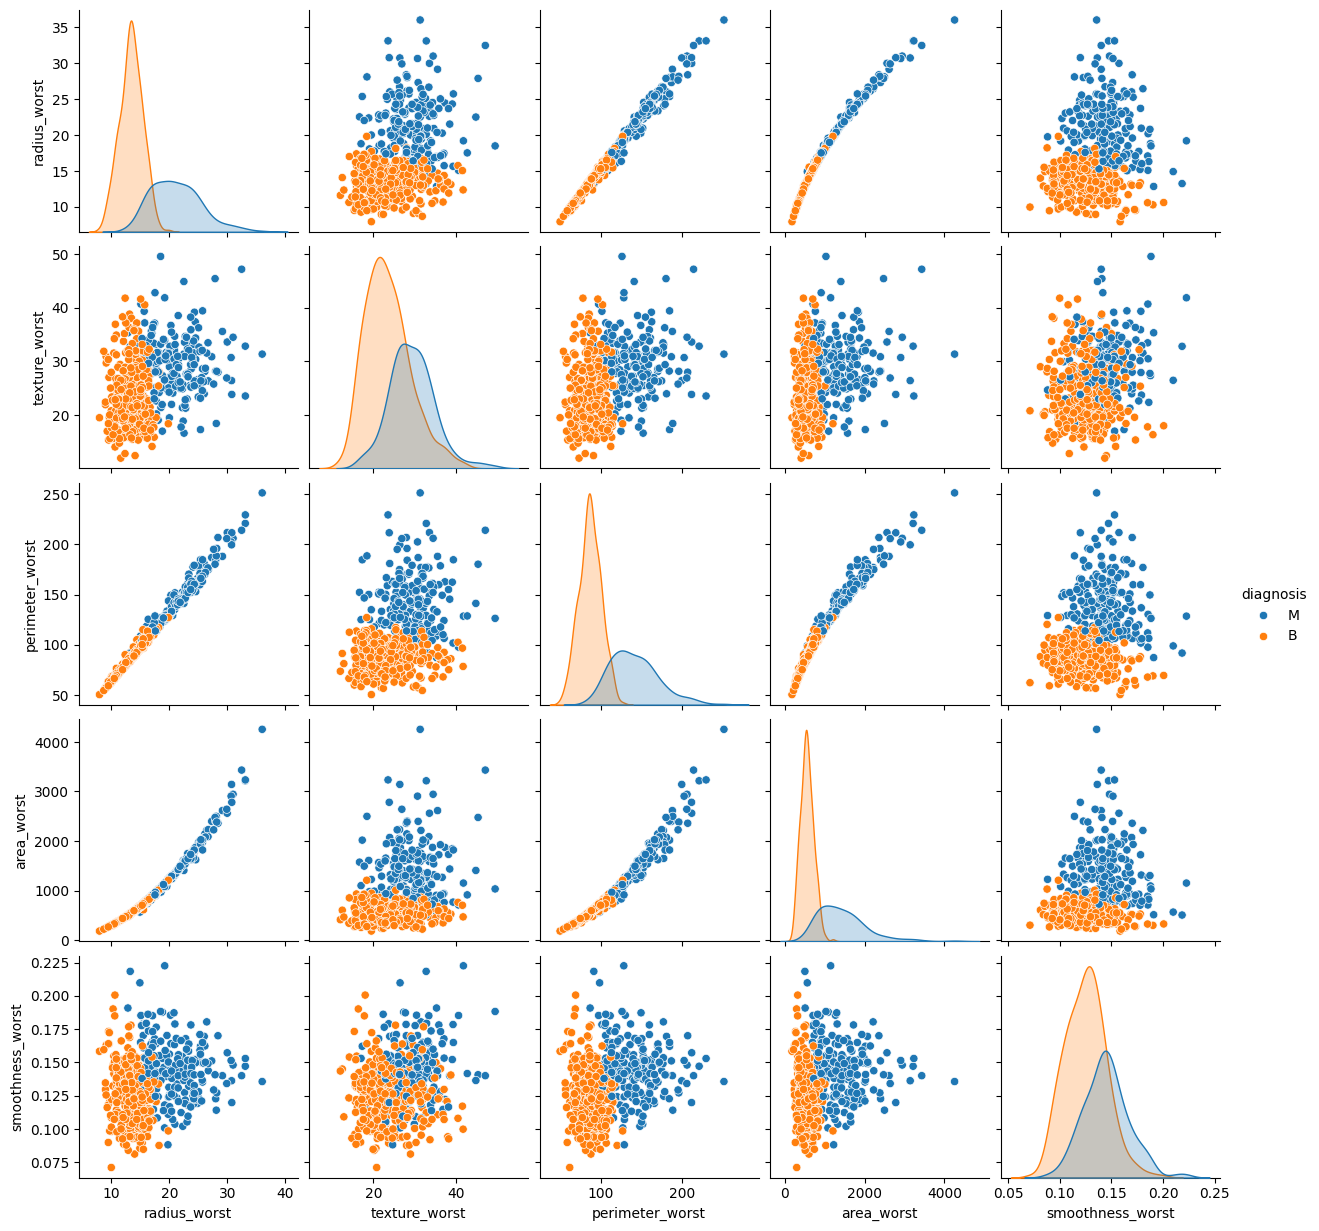

In [6]:
sns.pairplot(breast_cancer, vars=['radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst'],hue='diagnosis')
plt.show()

## convert categorical values to numerical values

In [7]:
label_encoder = LabelEncoder()
breast_cancer['diagnosis'] = label_encoder.fit_transform(breast_cancer['diagnosis'])
breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Normalize the features to have a mean and a standard daviation

In [8]:
features_to_scale = breast_cancer.columns.drop(['id', 'diagnosis'])
scaler = StandardScaler()
breast_cancer[features_to_scale] = scaler.fit_transform(breast_cancer[features_to_scale])

## Split data into feature(x) and target(y)

In [9]:
x = breast_cancer.drop(['id', 'diagnosis'], axis=1)
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [10]:
y = breast_cancer['diagnosis']
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

## Split data into training and testing 

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=10)


## Create scatterplot to visualize the  first two feature 

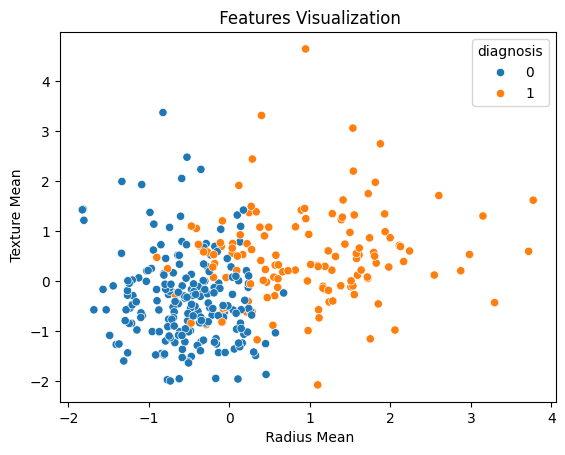

In [12]:
sns.scatterplot(x=x_train['radius_mean'], y=x_train['texture_mean'], hue=y_train)
plt.title(' Features Visualization')
plt.xlabel(' Radius Mean')
plt.ylabel(' Texture Mean')
plt.show()

## Train the svm model

In [13]:
svm_model = SVC(kernel='linear')
svm_model.fit(x_train, y_train)

SVC(kernel='linear')

## Prediction

In [14]:
y_pred = svm_model.predict(x_test)

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       149
           1       0.96      0.99      0.97        79

    accuracy                           0.98       228
   macro avg       0.98      0.98      0.98       228
weighted avg       0.98      0.98      0.98       228



## Confusion matrix 

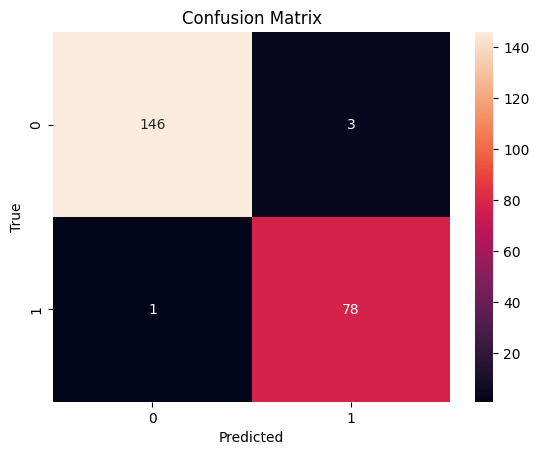

In [16]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Define the k-fold cross validation procedure

In [17]:
kfold = KFold(n_splits=7, shuffle=True, random_state=3)


## Perform the k-fold cross-validation and store the scores

In [18]:
cv_scores = cross_val_score(svm_model, x, y, cv=kfold, scoring='accuracy')


In [19]:
cv_scores

array([0.96341463, 0.98780488, 0.98765432, 0.96296296, 0.96296296,
       0.97530864, 0.98765432])

## Visualize the score

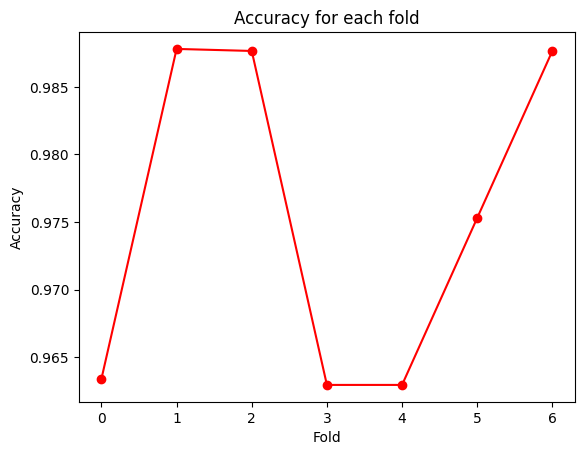

In [20]:
plt.plot(cv_scores, marker='o', linestyle='-', color='r')
plt.title('Accuracy for each fold')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.show()

## Evalution metrics

In [21]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [22]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.9824561403508771
Precision: 0.9629629629629629
Recall: 0.9873417721518988
F1 Score: 0.975


## Take user input for parameters to predict 

In [23]:

user_input=input("Enter the values one by one")
user_input=user_input.split(",")


for i in range(len(user_input)):
    # convert each item to int type
    user_input[i] = float(user_input[i])

user_input=np.array(user_input)
user_input=user_input.reshape(1,-1)
user_input=scaler.transform(user_input)
scv_Y_pred=svm_model.predict(user_input)
if(scv_Y_pred[0]==1):
  print("Warning! You should go see a Doctor!")
else:
  print("You are healthy!")

ValueError: could not convert string to float: '17.99 10.38 122.8 1001 0.1184 0.2776 0.3001 0.1471 0.2419 0.07871 1.095 0.9053 8.589 153.4 0.00639 0.04904 0.05373 0.01587 0.03003 0.006193 25.38 17.33 184.6 2019 0.1622 0.6656 0.7119 0.2654 0.4601 0.1189'

# SUMMARY :-

1. **Data Collection**: 

2. **Preprocessing**:
                       Python code snippet that demonstrates data preprocessing steps for a breast cancer dataset. This includes handling missing values, encoding categorical variables, and normalizing the data. Visualization of the preprocessed data is also included.

3. **Feature Selection**:
                        Python code snippet that demonstrates feature selection using a univariate statistical test (ANOVA F-test) and visualization of the selected features. This method selects the features based on the highest scores.

4. **Model Training**: 

5. **Validation**:
                 Python code snippet that demonstrates how to perform k-fold cross-validation on a machine learning model using the KFold class from scikit-learn. This example uses a Support Vector Machine (SVM) for classification.

6. **Evaluation**:
                 To evaluate the performance of a machine learning model for breast cancer detection.This code uses the scikit-learn library to compute the accuracy, precision, recall, and F1-score, and it visualizes the results with a confusion matrix.